In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Le jeu de données commence en 1991 et se termine avec une semaine récente.

In [96]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

Pour éviter des problèmes liés à l'indisponibilité et à l'altération des données, on récupère les données dans un fichier local et on effectue le téléchargement uniquement si le fichier local n'existe pas.

In [97]:
data_file = "data-varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

On lit les données depuis le fichier local

In [98]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202103          7   9306     6327   12285      14           9   
1     202102          7   7846     5464   10228      12           8   
2     202101          7  10531     7755   13307      16          12   
3     202053          7  11978     8406   15550      18          13   
4     202052          7  12012     8285   15739      18          12   
5     202051          7  10564     7574   13554      16          11   
6     202050          7   7063     4744    9382      11           7   
7     202049          7   5026     3145    6907       8           5   
8     202048          7   6683     4312    9054      10           6   
9     202047          7   4999     2963    7035       8           5   
10    202046          7   3752     1963    5541       6           3   
11    202045          7   3696     2016    5376       6           3   
12    202044          7   4391     2375    6407       7           4   
13    202043          7   4376     2505    6247       7           4   
14    202042          7   4000     1979    6021       6           3   
15    202041          7   3961     2099    5823       6           3   
16    202040          7   2078      675    3481       3           1   
17    202039          7   1049      237    1861       2           1   
18    202038          7   2253      782    3724       3           1   
19    202037          7   1584      405    2763       2           0   
20    202036          7    919      100    1738       1           0   
21    202035          7    828        0    1694       1           0   
22    202034          7   2272      371    4173       3           0   
23    202033          7   1284      177    2391       2           0   
24    202032          7   2650      689    4611       4           1   
25    202031          7   1303      100    2506       2           0   
26    202030          7   1385       75    2695       2           0   
27    202029          7    841       10    1672       1           0   
28    202028          7    728        0    1515       1           0   
29    202027          7    986      149    1823       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1543  199126          7  17608    11304   23912      31          20   
1544  199125          7  16169    10700   21638      28          18   
1545  199124          7  16171    10071   22271      28          17   
1546  199123          7  11947     7671   16223      21          13   
1547  199122          7  15452     9953   20951      27          17   
1548  199121          7  14903     8975   20831      26          16   
1549  199120          7  19053    12742   25364      34          23   
1550  199119          7  16739    11246   22232      29          19   
1551  199118          7  21385    13882   28888      38          25   
1552  199117          7  13462     8877   18047      24          16   
1553  199116          7  14857    10068   19646      26          18   
1554  199115          7  13975     9781   18169      25          18   
1555  199114          7  12265     7684   16846      22          14   
1556  199113          7   9567     6041   13093      17          11   
1557  199112          7  10864     7331   14397      19          13   
1558  199111          7  15574    11184   19964      27          19   
1559  199110          7  16643    11372   21914      29          20   
1560  199109          7  13741     8780   18702      24          15   
1561  199108          7  13289     8813   17765      23          15   
1562  199107          7  12337     8077   16597      22          15   
1563  199106          7  10877     7013   14741      19          12   
1564  199105          7  10442     6544   14340      18          11   
1565  199104          7   7913     4563   11263      14           8   
1566  199103          7  15387    10484   20290      27          18   
1567  199102          7  16277  

On vérifie s'il y a des points manquants dans ce jeu de données

In [99]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Pas de point manquant détécté sur ce jeu de données.
On applique tout de même une suppression des données vides au cas où ce document serait réutilisé avec un autre jeu de données.

In [100]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202103          7   9306     6327   12285      14           9   
1     202102          7   7846     5464   10228      12           8   
2     202101          7  10531     7755   13307      16          12   
3     202053          7  11978     8406   15550      18          13   
4     202052          7  12012     8285   15739      18          12   
5     202051          7  10564     7574   13554      16          11   
6     202050          7   7063     4744    9382      11           7   
7     202049          7   5026     3145    6907       8           5   
8     202048          7   6683     4312    9054      10           6   
9     202047          7   4999     2963    7035       8           5   
10    202046          7   3752     1963    5541       6           3   
11    202045          7   3696     2016    5376       6           3   
12    202044          7   4391     2375    6407       7           4   
13    202043          7   4376     2505    6247       7           4   
14    202042          7   4000     1979    6021       6           3   
15    202041          7   3961     2099    5823       6           3   
16    202040          7   2078      675    3481       3           1   
17    202039          7   1049      237    1861       2           1   
18    202038          7   2253      782    3724       3           1   
19    202037          7   1584      405    2763       2           0   
20    202036          7    919      100    1738       1           0   
21    202035          7    828        0    1694       1           0   
22    202034          7   2272      371    4173       3           0   
23    202033          7   1284      177    2391       2           0   
24    202032          7   2650      689    4611       4           1   
25    202031          7   1303      100    2506       2           0   
26    202030          7   1385       75    2695       2           0   
27    202029          7    841       10    1672       1           0   
28    202028          7    728        0    1515       1           0   
29    202027          7    986      149    1823       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1543  199126          7  17608    11304   23912      31          20   
1544  199125          7  16169    10700   21638      28          18   
1545  199124          7  16171    10071   22271      28          17   
1546  199123          7  11947     7671   16223      21          13   
1547  199122          7  15452     9953   20951      27          17   
1548  199121          7  14903     8975   20831      26          16   
1549  199120          7  19053    12742   25364      34          23   
1550  199119          7  16739    11246   22232      29          19   
1551  199118          7  21385    13882   28888      38          25   
1552  199117          7  13462     8877   18047      24          16   
1553  199116          7  14857    10068   19646      26          18   
1554  199115          7  13975     9781   18169      25          18   
1555  199114          7  12265     7684   16846      22          14   
1556  199113          7   9567     6041   13093      17          11   
1557  199112          7  10864     7331   14397      19          13   
1558  199111          7  15574    11184   19964      27          19   
1559  199110          7  16643    11372   21914      29          20   
1560  199109          7  13741     8780   18702      24          15   
1561  199108          7  13289     8813   17765      23          15   
1562  199107          7  12337     8077   16597      22          15   
1563  199106          7  10877     7013   14741      19          12   
1564  199105          7  10442     6544   14340      18          11   
1565  199104          7   7913     4563   11263      14           8   
1566  199103          7  15387    10484   20290      27          18   
1567  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [101]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [102]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Aucune incohérence n'a été détécté dans les données.

In [103]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

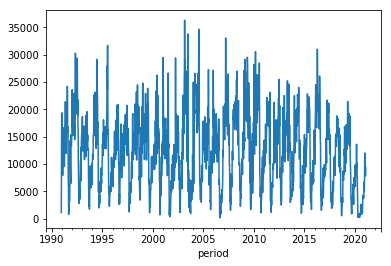

In [104]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre des pics durant les 4 prmeiers mois de l'année et des creux vers la fin de l'été (vers septembre)

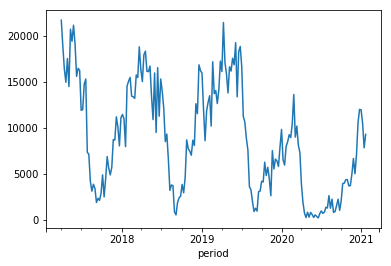

In [105]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Encore un petit détail: les données commencent an octobre 1991, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1992.

In [106]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1992,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [107]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

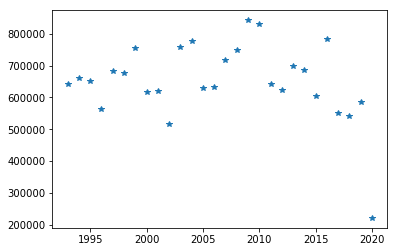

In [108]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [109]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu une seule au cours des 35 dernières années.

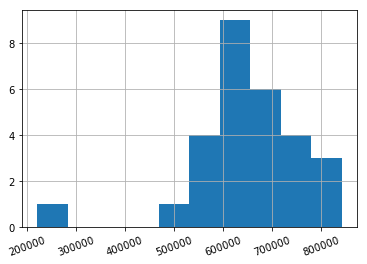

In [110]:
yearly_incidence.hist(xrot=20)